In [1]:
#Tout le data frame dans le streamlite

import osmnx as ox # OSMNX is an awnsome package
import pandas as pd


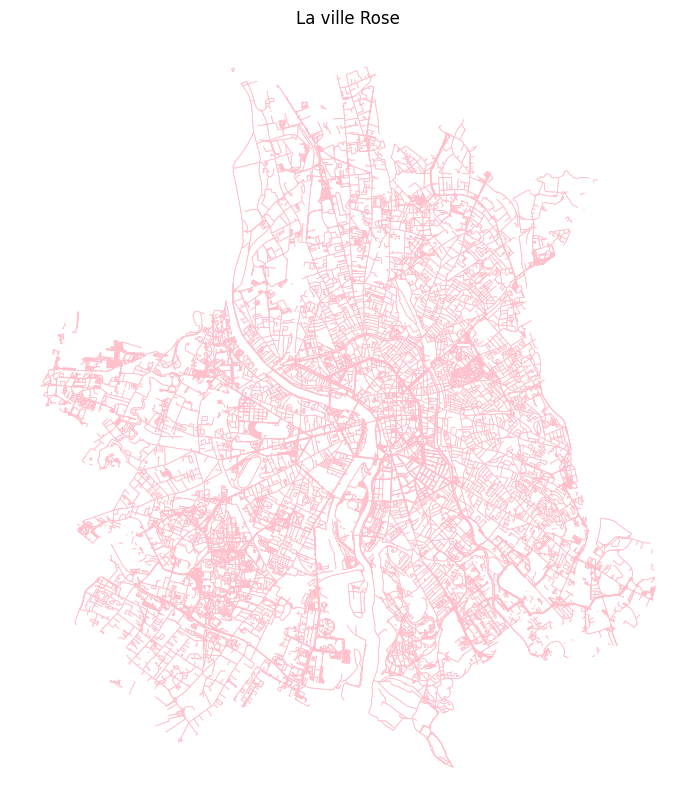

In [3]:
# We chose the City
place = [" TOULOUSE " ]
gdf_nodes = gdf_edges = None
for place in place:
    G = ox.graph_from_place(place, retain_all=True, simplify = True, network_type='walk')
    n_, e_ = ox.graph_to_gdfs(G)
    n_["place"] = place
    e_["place"] = place
    if gdf_nodes is None:
        gdf_nodes = n_
        gdf_edges = e_
    else:
        gdf_nodes = pd.concat([gdf_nodes, n_])
        gdf_edges = pd.concat([gdf_edges, e_])
        
# Plot it !
import matplotlib.pyplot as plt         
from matplotlib.colors import ListedColormap
#plt.style.use('dark_background')
colors = {'Toulouse':'pink'}
fig=gdf_edges.plot(column="place", cmap=ListedColormap([colors[k] for k in sorted(colors.keys())]), figsize=(10, 10),
                  alpha=1, linewidth=0.5)

plt.title("La ville Rose")
plt.xticks([])
plt.yticks([])
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['left'].set_visible(False)
plt.savefig("FIESTA.jpg", dpi=600, format="jpg")
plt.show()